<a href="https://colab.research.google.com/github/freddy-7/TI3002C/blob/main/5_Extracci%C3%B3n_de_Caracter%C3%ADsticas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Instalamos librería para análisis de variables categóricas
%pip install funpymodeling

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
#Importamos las librerias pandas, numpy y matplotlib respectivamente
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from funpymodeling.exploratory import freq_tbl 

In [ ]:
#Cargar archivo csv desde equipo
from google.colab import files
files.upload()

In [ ]:
%pip install openpyxl

In [3]:
#Carga desde un archivo .xlsx sin indice
Micro_Retailer= pd.read_excel('microretailer_mit_lift_lab.xlsx') 

In [5]:
#Verificamos información del DataFrame
Micro_Retailer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Columns: 106 entries, _record_id to 235_email
dtypes: float64(23), int64(2), object(81)
memory usage: 141.7+ KB


In [ ]:
#Imprimo los primeros 5 registro del dataframe
Micro_Retailer.head()

In [ ]:
#Obtengo un análisis univariado de las variables categóricas
freq_tbl(Micro_Retailer)

In [ ]:
#Obtengo un análisis univariado de una variable categórica en específico
table1= freq_tbl(Micro_Retailer['214_customer_relationship_tools'])
table1

In [ ]:
#Elimino las columnas "percentage" y "cumulative_perc" para trabajar con las frecuencias
table2= table1.drop(['percentage','cumulative_perc'], axis=1)
table2

In [ ]:
#Obtengo un filtro de los valores más reelevantes de la variables categórica seleccionada
Filtro= table2[table2['frequency']>1]
Filtro

In [ ]:
#Ajusto el indice de mi dataframe
Filtro_index= Filtro.set_index('214_customer_relationship_tools')
Filtro_index

Text(0, 0.5, 'Frecuencia')

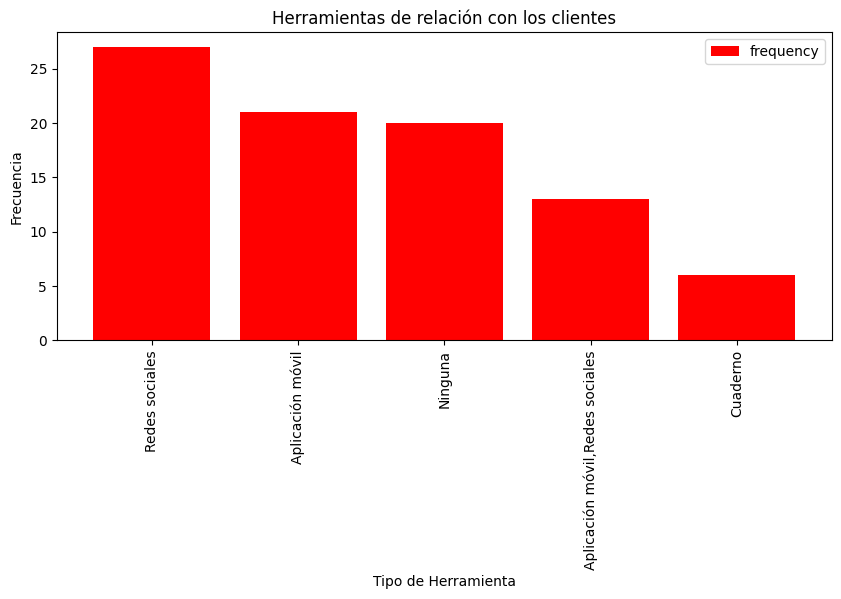

In [14]:
#Realizamos grafico de barras del dataframe filtrado
Filtro_index.plot(kind = 'bar', width=0.8, figsize=(10,4), color= "red")
plt.title('Herramientas de relación con los clientes')
plt.xlabel('Tipo de Herramienta')
plt.ylabel('Frecuencia')

<Axes: xlabel='frequency', ylabel='cumulative_perc'>

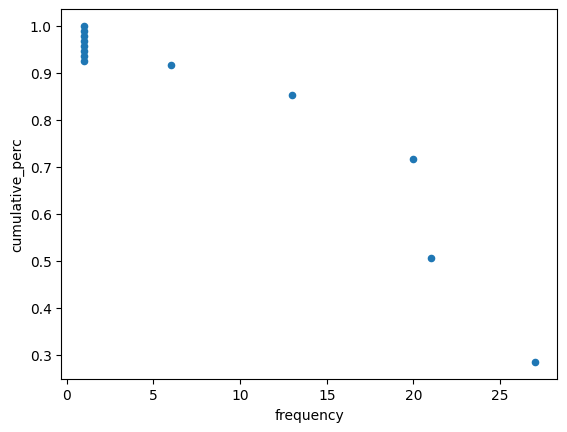

In [10]:
#Realizamos grafico de dispersión del dataframe filtrado
table1.plot("frequency", "cumulative_perc", kind="scatter")

In [ ]:
#Realizamos grafico de área del dataframe filtrado
Filtro_index.plot(kind='area', figsize=(10,4),alpha = 0.5)

In [ ]:
#Realizamos grafico de pastel del dataframe filtrado
Filtro_index["frequency"].plot(kind='pie', figsize=(10,5), shadow=True, autopct="%0.1f %%")

<Axes: xlabel='frequency', ylabel='cumulative_perc'>

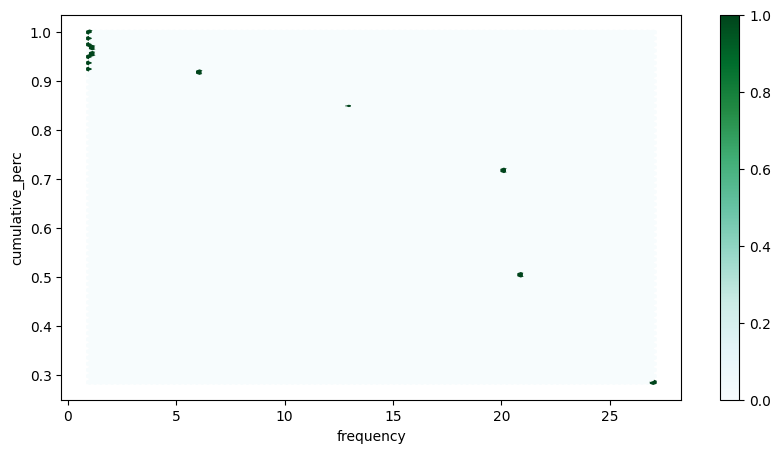

In [13]:
#Realizamos grafico hexagonal del dataframe filtrado, alternativo al scatter plot
table1.plot.hexbin("frequency", "cumulative_perc", figsize=(10,5))

**Determinación de Clases para datos agrupados**


In [17]:
# Ajustar maximo de filas
pd.options.display.max_rows = None

In [ ]:
#Corroboramos valores nulos
valores_nulos=Micro_Retailer.isnull().sum()
valores_nulos

In [ ]:
#Calculamos el numero total de la población "n"
Micro_Retailer['_latitude']. info()
n=171

In [20]:
#Obtenemos el limite superior y el límite inferior de la columna objetivo
Max=Micro_Retailer['_latitude'].max()
Min=Micro_Retailer['_latitude'].min()
Limites= [Min, Max]
Limites

[18.9993095, 19.0752733]

In [21]:
#Calculamos el rango R
R=Max-Min
R

0.07596380000000025

In [22]:
#Calculamos el número de Intervalos de Clase "ni", aplicando la regla de Sturges
ni= 1+3.32*np.log10(n)
ni

8.41354708650195

In [20]:
#Calculamos el Ancho del Intervalo "i"
i=R/ni
i

0.009028748424296662

**Creación de Categorias a partir de clases**

In [23]:
#Categorización de variables
#Declaramos 2 intervalos (menores de 100) y (mayores de 100)
#Ajustamos los limites para que todos los valores sean incluidos en los intervalos
intervalos=np.linspace(18.9993094, 19.0752734, 9)
intervalos

array([18.9993094, 19.0088049, 19.0183004, 19.0277959, 19.0372914,
       19.0467869, 19.0562824, 19.0657779, 19.0752734])

In [24]:
#Creamos las categorías 
categorias= ["Categoría1", "Categoría2","Categoría3", "Categoría4",
             "Categoría5", "Categoría6","Categoría7", "Categoría8"]

In [ ]:
#Finalmente creamos las categorías en la columna numérica
Micro_Retailer['_latitude']=pd.cut(x= Micro_Retailer['_latitude'], bins=intervalos, labels= categorias )
Micro_Retailer['_latitude']